<a href="https://colab.research.google.com/github/Yash-Jumde/Colab-Notebooks/blob/main/Transfer_Learning_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Fine Tuning </h1>

For feature extraction, we may only train 1-3 layers of a pre-trained model with our data.

In fine-tuning we might train 1-3+ layers of a pre-trained model. (Meaning the top layers can be unfrozen and trained according to our data.)

In [ ]:
import tensorflow as tf

tf.__version__

'2.15.0'

In [ ]:
!nvidia-smi

Tue May 21 14:01:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Importing helper functions.

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
# Get 10% of the actual data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")


--2024-05-21 14:01:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  66.5MB/s    in 2.4s    

2024-05-21 14:01:30 (66.5 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In [ ]:
# Create train and test directory paths.

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
# To load the image data in a tensorflow format
# here we're using the tf.keras.utils.image_from_directory()


In [ ]:
IMG_SIZE = (224, 224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode='categorical',
                                                                 batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

The batch_size is None due to it only being used during model training. You can think of None as a placeholder waiting to be filled with the batch_size parameter from image_dataset_from_directory().

In [ ]:
# here we can directly find the class names

train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# if we want to see an example batch

for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.31372452e+02 2.28372452e+02 2.09372452e+02]
   [2.30545914e+02 2.27545914e+02 2.10545914e+02]
   [2.34469391e+02 2.31469391e+02 2.14897964e+02]
   ...
   [2.39632629e+02 2.35632629e+02 2.23632629e+02]
   [2.37331665e+02 2.33331665e+02 2.21331665e+02]
   [2.40974457e+02 2.36974457e+02 2.25974457e+02]]

  [[2.26739792e+02 2.23739792e+02 2.06739792e+02]
   [2.37214294e+02 2.34214294e+02 2.17214294e+02]
   [2.30545914e+02 2.27545914e+02 2.10974487e+02]
   ...
   [2.39158157e+02 2.35158157e+02 2.23158157e+02]
   [2.41790848e+02 2.37790848e+02 2.25790848e+02]
   [2.42959091e+02 2.38959091e+02 2.27959091e+02]]

  [[2.31566330e+02 2.28566330e+02 2.11994904e+02]
   [2.38668365e+02 2.35668365e+02 2.19096939e+02]
   [2.36984680e+02 2.33984680e+02 2.18984680e+02]
   ...
   [2.36219269e+02 2.32219269e+02 2.20219269e+02]
   [2.35540878e+02 2.31540878e+02 2.19540878e+02]
   [2.37229477e+02 2.33229477e+02 2.22229477e+02]]

  ...

  [[2.33479691e+02 2.35479691e+02 2.14265427e+02]
   [2

The image arrays come out as tensors of pixel values where as the labels come out as one-hot encodings

In [ ]:
# tf.keras.applications has a series of already trained models.

In [ ]:
# Step-wise model formation:

# 1. Create base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
# include_top = False means we will be creating our own top/output layer.

# 2. Freeze the base model
base_model.trainable = False
# Freezes all the weights/patterns in the pre-trained model

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# 4. Normalize the data (required for ResNet50V2)
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the input to the model
x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'After GlobalAveragePooling2D(): {x.shape}')

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# 8. Combine the inputs with outputs
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model.
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 10. Fit the model
history_model_0 = model_0.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              # let's decrease validation_steps for faster epochs.
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback('transfer_learn', '10_percent_feature_extract')])

24274472/24274472 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learn/10_percent_feature_extract/20240521-140149
Epoch 1/5
24/24 [==============================] - 19s 295ms/step - loss: 1.9642 - accuracy: 0.3680 - val_loss: 1.4167 - val_accuracy: 0.6546
Epoch 2/5
24/24 [==============================] - 6s 222ms/step - loss: 1.1797 - accuracy: 0.7480 - val_loss: 0.9481 - val_accuracy: 0.8059
Epoch 3/5
24/24 [==============================] - 6s 209ms/step - loss: 0.8673 - accuracy: 0.8013 - val_loss: 0.7565 - val_accuracy: 0.8322
Epoch 4/5
24/24 [==============================] - 4s 164ms/step - loss: 0.7011 - accuracy: 0.8453 - val_loss: 0.6525 - val_accuracy: 0.8438
Epoch 5/5
24/24 [==============================] - 8s 308ms/step - loss: 0.6055 - accuracy: 0.8627 - val_loss: 0.5766 - val_accuracy: 0.8602


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [ ]:
# Lots of layers.
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
__________________

The model has overall 5 layers, but one of those layers has 269 layers  inside it.

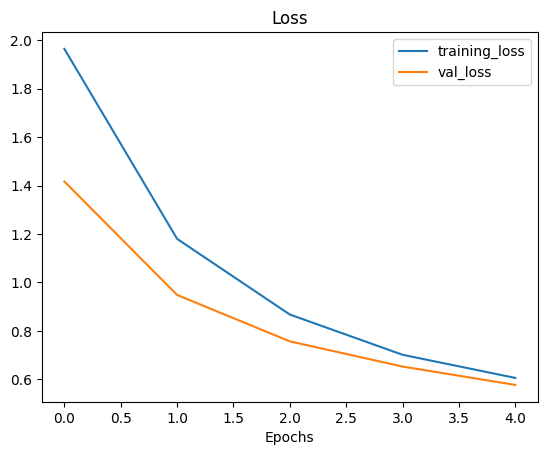

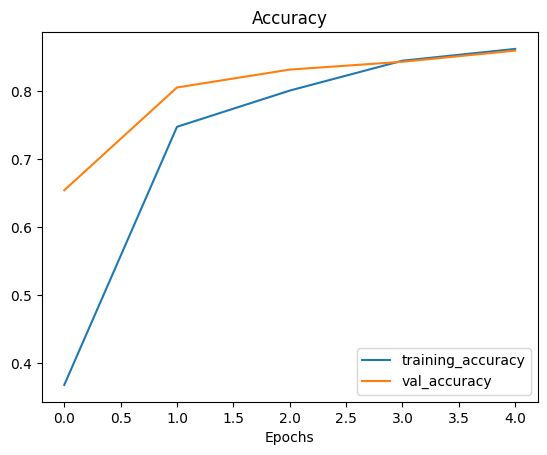

In [ ]:
plot_loss_curves(history=history_model_0)

The **tf.keras.layers.GlobalAveragePooling()** layer transforms a 4D tensor to a 2D tensor by averaging the values across the inner-axes.

In [ ]:
# Let's see it in action:

# Define an input shape
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(10)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through the layer
glo_avg_pooled_layer = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {glo_avg_pooled_layer}\n")

# Check the shapes:
print(f"Shape of the input tensor: {input_tensor.shape}")
print(f"Shape of 2D global average pooled random tensor: {glo_avg_pooled_layer.shape}")

Random input tensor:
 [[[[-8.7578082e-01  3.3563688e-01 -3.5219625e-01]
   [-3.0314562e-01 -3.8829651e-02  9.6529824e-01]
   [ 6.2538046e-01  2.6650238e+00 -4.6370643e-01]
   [-9.2393184e-01 -1.0020103e+00 -1.9497077e+00]]

  [[ 1.0608298e+00  1.2749594e+00  7.1811008e-01]
   [ 6.8230331e-01  1.8500848e-01  4.2902163e-01]
   [-4.8913226e-01  2.3932166e-01 -1.3439546e+00]
   [ 1.3551772e-01  1.1242433e+00 -5.6185681e-01]]

  [[ 1.0946635e+00 -5.8914816e-01  5.4948783e-01]
   [ 3.4412482e-01 -1.2461275e+00 -1.8717276e+00]
   [-5.1337874e-01  8.2369035e-01 -1.3095583e-01]
   [ 4.7080812e-01 -2.0028423e-03  1.2873838e+00]]

  [[-1.4886125e+00  7.9556215e-01 -9.2247504e-01]
   [ 6.1526114e-01 -5.1460862e-01  1.3799419e+00]
   [-2.0532391e+00 -8.2675463e-01 -5.8801931e-01]
   [ 9.5981181e-01 -6.8919373e-01  2.2478814e+00]]]]

2D global average pooled random tensor:
 [[-0.04115752  0.15842319 -0.03796718]]

Shape of the input tensor: (1, 4, 4, 3)
Shape of 2D global average pooled random tenso

In [ ]:
# We can replicate this as follows:
tf.reduce_mean(input_tensor, axis=[1,2]) # average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.04115752,  0.15842319, -0.03796718]], dtype=float32)>

Doing this not only makes the output of the base model compatible with the input shape requirement of our output layer (tf.keras.layers.Dense()), it also condenses the information found by the base model into a lower dimension feature vector.

In [ ]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(10)
input_tensor = tf.random.normal(input_shape)

glo_max_pool_tensor = tf.keras.layers.GlobalMaxPool2D()(input_tensor)

print(input_tensor.shape, glo_max_pool_tensor.shape)

(1, 4, 4, 3) (1, 3)


In [ ]:
# Model_1 --> using feature extraxtion to learn on 1% of the training data with data augmentation


In [ ]:
# Data for model 1
!wget -q https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

train_dir_1 = '10_food_classes_1_percent/train'
test_dir = '10_food_classes_1_percent/test'

In [ ]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There a

In [ ]:
# Only 7 images per class is too little to train the model on??

In [ ]:
IMG_SIZE = (224, 224)

train_data_1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1,
                                                                   label_mode='categorical',
                                                                   batch_size=32,
                                                                   image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Data has been loaded. Now, we augment this data.
# Directly build data aug into the model.

Adding a Data augmentation layer has following benefits:


*   Preprocesesing of images happens on the GPU rather then the CPU, thus it is much faster
*   Image augmentation happens only when training, so we can export our model and use it elsewhere.



Here we have used:
* [`tf.keras.layers.RandomFlip`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip) - flips image on horizontal or vertical axis.
* [`tf.keras.layersRandomRotation`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomRotation) - randomly rotates image by a specified amount.
* [`tf.keras.layers.RandomZoom`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomZoom) - randomly zooms into an image by specified amount.
* [`tf.keras.layers.RandomHeight`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomHeight) - randomly shifts image height by a specified amount.
* [`tf.keras.layers.RandomWidth`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomWidth) - randomly shifts image width by a specified amount.
* [`tf.keras.layers.Rescaling`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling) - normalizes the image pixel values to be between 0 and 1, this is worth mentioning because it is required for some image models but since we're using [`tf.keras.applications.efficientnet_v2.EfficientNetV2B0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet_v2/EfficientNetV2B0), it's not required (the model pretrained model implements rescaling itself).

In [ ]:
# Creating the data augmentation stage:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
], name = 'data_augmentation')

(-0.5, 471.5, 535.5, -0.5)

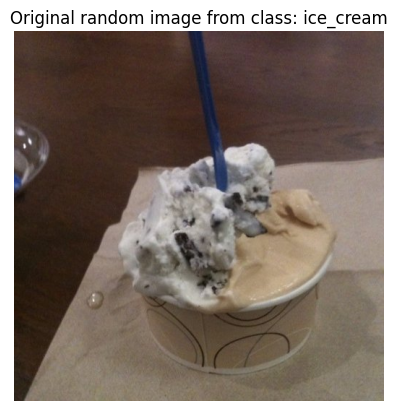

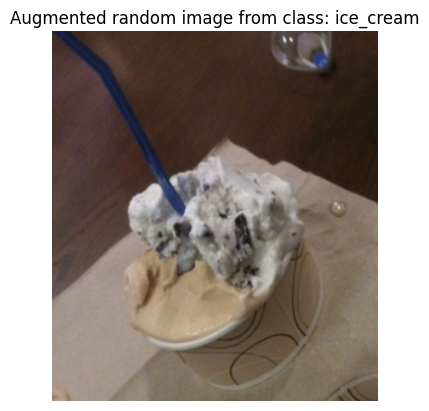

In [ ]:
# view a random image.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1.class_names)
target_dir = '10_food_classes_1_percent/train' + '/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis('off')

# Augmented image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
# data augmentation layer requires shape (None, Height, Width, channels/3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
# Requires normaliztion after augmentation.
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)

In [ ]:
# Create model_1

input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name='input_layer')

x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_model_1 = model_1.fit(train_data_1,
                              epochs=5,
                              steps_per_epoch=len(train_data_1),
                              validation_data=test_data,
                              validation_steps=int(0.25*len(test_data)),
                              callbacks=[create_tensorboard_callback('transfer_learning', '1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240521-140301
Epoch 1/5
3/3 [==============================] - 23s 4s/step - loss: 2.3769 - accuracy: 0.1000 - val_loss: 2.2197 - val_accuracy: 0.1826
Epoch 2/5
3/3 [==============================] - 6s 2s/step - loss: 2.1772 - accuracy: 0.1857 - val_loss: 2.1124 - val_accuracy: 0.2451
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 1.9850 - accuracy: 0.3714 - val_loss: 2.0331 - val_accuracy: 0.3059
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.8232 - accuracy: 0.4429 - val_loss: 1.9529 - val_accuracy: 0.3470
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.7136 - accuracy: 0.4857 - val_loss: 1.8657 - val_accuracy: 0.3997


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [ ]:
results_1_percent_data = model_1.evaluate(test_data)
results_1_percent_data

79/79 [==============================] - 7s 85ms/step - loss: 1.8664 - accuracy: 0.3924


[1.8664418458938599, 0.39239999651908875]

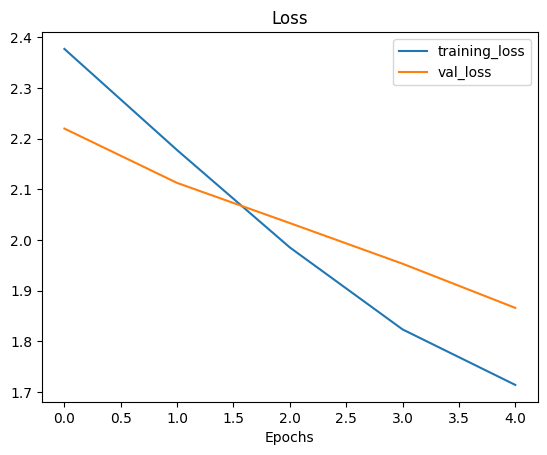

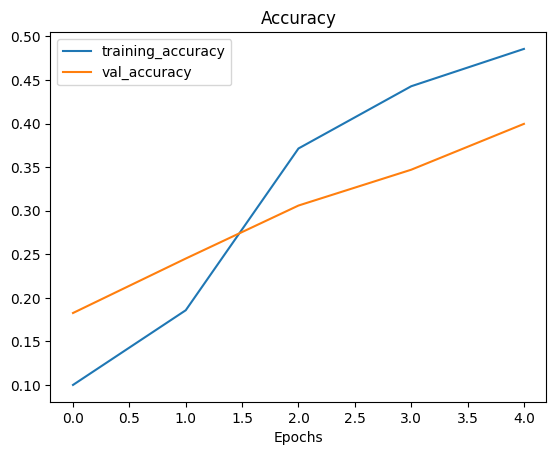

In [ ]:
plot_loss_curves(history_model_1)

In [ ]:
# Model 2 on 10% of the training data.

In [ ]:
train_dir_10_per = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
IMG_SIZE = (224, 224)
train_data_10 = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_per,
                                                                    label_mode='categorical',
                                                                    image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
], name = 'data_augmentation')

input_shape = (224, 224, 3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name='input_layer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = layers.Dense(10, activation='softmax', name='outpuy_layer')(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Functionalize the model making parameters

def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:

    # Create the base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup the inputs and outputs
    inputs = layers.Input(shape=input_shape, name = 'input_layer')
    x = data_augmentation(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D(name='global_average_pool_layer')(x)
    outputs = layers.Dense(units=output_shape, activation='softmax', name='output_layer')(x)
    model = tf.keras.Model(inputs, outputs)

    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])

    return model

In [ ]:
# Creating a model checkpoint callback

The ModelCheckpoint callback gives you the ability to save your model, as a whole in the SavedModel format or the weights (patterns) only to a specified directory as it trains.

This is helpful if you think your model is going to be training for a long time and you want to make backups of it as it trains. It also means if you think your model could benefit from being trained for longer, you can reload it from a specific checkpoint and continue training from there.

In [ ]:
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # To save entire model set to False
                                                         save_best_only=True, # save only the best model weights instead of the model for every epoch
                                                         save_freq='epoch', # save every epoch
                                                         verbose=1)

In [ ]:
ini_epochs = 5
history_10_per_data_aug_model = model_2.fit(train_data_10,
                                            epochs=ini_epochs,
                                            validation_data=test_data,
                                            validation_steps=int(0.25 * len(test_data)),
                                            callbacks=[create_tensorboard_callback('transfer_learning', '10_per_data_aug'),
                                                       checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_per_data_aug/20240521-140359
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0397 - accuracy: 0.3040
Epoch 1: val_loss improved from inf to 1.52943, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 38s 1s/step - loss: 2.0397 - accuracy: 0.3040 - val_loss: 1.5294 - val_accuracy: 0.5724
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4276 - accuracy: 0.6253
Epoch 2: val_loss improved from 1.52943 to 1.08081, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 28s 1s/step - loss: 1.4276 - accuracy: 0.6253 - val_loss: 1.0808 - val_accuracy: 0.7549
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1156 - accuracy: 0.7267
Epoch 3: val_loss improved from 1.08081 to 0.88703, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [===========

In [ ]:
results_10_per_data_aug = model_2.evaluate(test_data)
results_10_per_data_aug

79/79 [==============================] - 5s 58ms/step - loss: 0.6725 - accuracy: 0.8176


[0.6724815368652344, 0.8176000118255615]

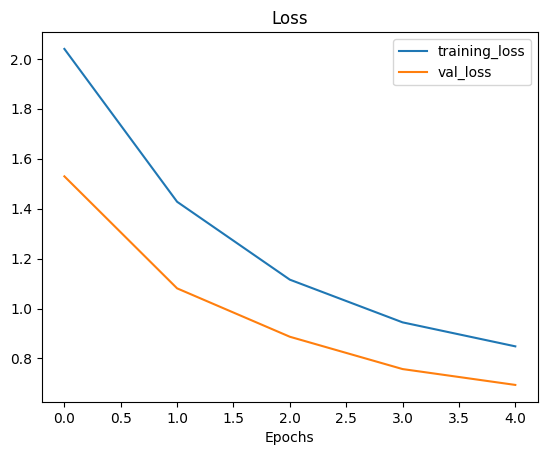

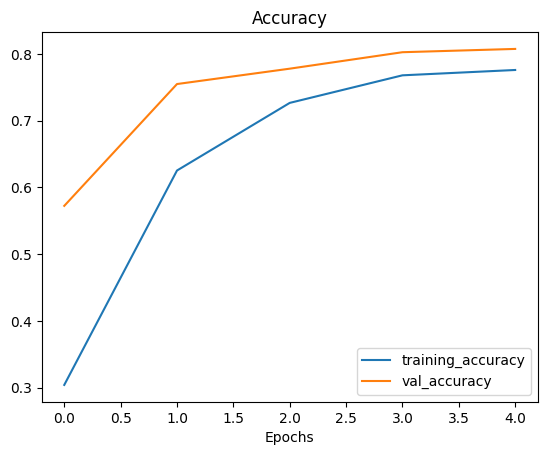

In [ ]:
# Plotting the loss curves
plot_loss_curves(history_10_per_data_aug_model)

In [ ]:
# The curves are heading in the right direction but they'll give better results if we train the model for longer

In [ ]:
# Load in saved model
model_2.load_weights(checkpoint_path)
loaded_weights = model_2.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.6725 - accuracy: 0.8176


In [ ]:
results_10_per_data_aug == loaded_weights

False

In [ ]:
# This should return true but doesn't because of precsion errors.

Fine Tuning existing model on 10% data

In [ ]:
model_2.layers

In [ ]:
for layer_number, layer in enumerate(model_2.layers):
  print(f"Layer number: {layer_number} \nLayer name: {layer.name} \nLayer type: {layer} \nTrainable? {layer.trainable}")

Layer number: 0 
Layer name: input_layer 
Layer type: <keras.src.engine.input_layer.InputLayer object at 0x7cbb26239600> 
Trainable? True
Layer number: 1 
Layer name: data_augmentation 
Layer type: <keras.src.engine.sequential.Sequential object at 0x7cbaa0539c90> 
Trainable? True
Layer number: 2 
Layer name: efficientnetv2-b0 
Layer type: <keras.src.engine.functional.Functional object at 0x7cbaa2d8fc10> 
Trainable? False
Layer number: 3 
Layer name: global_average_pooling_layer 
Layer type: <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7cbaa2fd9e10> 
Trainable? True
Layer number: 4 
Layer name: outpuy_layer 
Layer type: <keras.src.layers.core.dense.Dense object at 0x7cbaa2d0bfd0> 
Trainable? True


In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 outpuy_layer (Dense)        (None, 10)                1281

In [ ]:
model_2_base_model = model_2.layers[2]
print(len(model_2_base_model.trainable_variables))

0


In [ ]:
# Check which layers are tuneable

for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
# To fine tune the model to our data, we will unfreeze the top 10 layers.

Generally, the less data you have, the less layers you want to unfreeze and the more gradually you want to fine-tune.

In [ ]:
# Make all layers trainable
model_2_base_model.trainable = True

# Freeze all layers except the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

In [ ]:
# Let's check again:
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

Every time you make a change to your models, you need to recompile them.

In [ ]:
print(len(model_2.trainable_variables))

12


12 trainable variables, the last 10 layers of the base model and the weight and bias parameters of the Dense output layer.

In [ ]:
fine_tune_epochs = ini_epochs + 5

history_fine_10_per_data_aug = model_2.fit(train_data_10,
                                           epochs=fine_tune_epochs,
                                           validation_data=test_data,
                                           initial_epoch=history_10_per_data_aug_model.epoch[-1], # start from the last saved epoch
                                           validation_steps = int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback('transfer_learning', '10_percent_fine_tune_last10')]
                                           )


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last10/20240521-140632
Epoch 5/10
24/24 [==============================] - 35s 1s/step - loss: 0.7288 - accuracy: 0.8013 - val_loss: 0.5148 - val_accuracy: 0.8388
Epoch 6/10
24/24 [==============================] - 21s 861ms/step - loss: 0.6016 - accuracy: 0.8080 - val_loss: 0.4947 - val_accuracy: 0.8224
Epoch 7/10
24/24 [==============================] - 15s 612ms/step - loss: 0.5505 - accuracy: 0.8307 - val_loss: 0.4554 - val_accuracy: 0.8421
Epoch 8/10
24/24 [==============================] - 17s 711ms/step - loss: 0.5086 - accuracy: 0.8507 - val_loss: 0.4575 - val_accuracy: 0.8438
Epoch 9/10
24/24 [==============================] - 18s 717ms/step - loss: 0.4941 - accuracy: 0.8533 - val_loss: 0.4707 - val_accuracy: 0.8339
Epoch 10/10
24/24 [==============================] - 15s 610ms/step - loss: 0.4570 - accuracy: 0.8733 - val_loss: 0.4406 - val_accuracy: 0.8536


In [ ]:
# Evaluating the model
results_fine_tune_10_per = model_2.evaluate(test_data)

79/79 [==============================] - 5s 58ms/step - loss: 0.4501 - accuracy: 0.8500


In [ ]:
def compare_history(history_1, history_2, ini_epochs=5):
  acc = history_1.history['accuracy']
  loss = history_1.history['loss']
  print(len(acc))

  val_acc = history_1.history['val_accuracy']
  val_loss = history_1.history['val_loss']

  # Combine with new history
  total_acc = acc + history_2.history['accuracy']
  total_loss = loss + history_2.history['loss']

  total_val_acc = val_acc + history_2.history['val_accuracy']
  total_val_loss = val_loss + history_2.history['val_loss']

  print(len(total_acc))
  print(total_acc)

  # Plot the above data
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='Training accuracy')
  plt.plot(total_val_acc, label='Validation accuracy')
  plt.plot([ini_epochs-1, ini_epochs-1],
           plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training loss')
  plt.plot(total_val_loss, label='Validation loss')
  plt.plot([ini_epochs-1, ini_epochs-1],
           plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

5
11
[0.30399999022483826, 0.625333309173584, 0.7266666889190674, 0.7680000066757202, 0.7760000228881836, 0.8013333082199097, 0.8080000281333923, 0.8306666612625122, 0.8506666421890259, 0.8533333539962769, 0.8733333349227905]


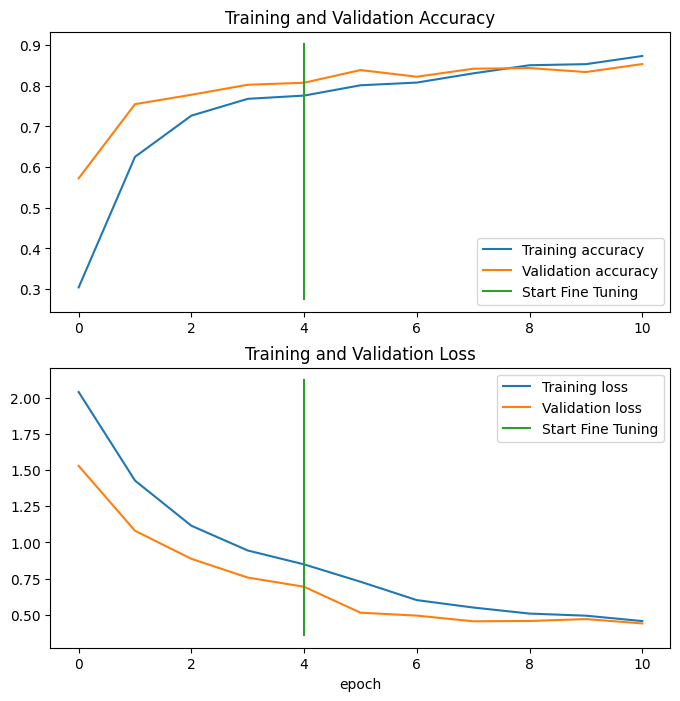

In [ ]:
compare_history(history_10_per_data_aug_model,
                history_fine_10_per_data_aug,
                ini_epochs=5)

In [ ]:
# Model 4: Fine-tuning on all of the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2024-05-21 14:08:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  26.7MB/s    in 7.8s    

2024-05-21 14:08:57 (63.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.

In [ ]:
# Setup data inputs
IMG_SIZE = (224, 224)
train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                     label_mode='categorical',
                                                                     image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 78ms/step - loss: 0.4501 - accuracy: 0.8500


[0.45005130767822266, 0.8500000238418579]

In [ ]:
results_fine_tune_10_per

[0.45005151629447937, 0.8500000238418579]

In [ ]:
model_3 = create_base_model(learning_rate=0.0001)

In [ ]:
model_3.load_weights(checkpoint_path)

In [ ]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pool_layer   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [ ]:
print(len(model_3.trainable_variables))

2


In [ ]:
model_3.evaluate(test_data)

79/79 [==============================] - 9s 61ms/step - loss: 0.6725 - accuracy: 0.8176


[0.6724817752838135, 0.8176000118255615]

In [ ]:
for layer_number, layer in enumerate(model_3.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pool_layer True
4 output_layer True


In [ ]:
model_3_base_model = model_3.layers[2]
model_3_base_model.trainable = True

for layer in model_3_base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
for layer_number, layer in enumerate(model_3_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

In [ ]:
fine_tune_epochs = ini_epochs + 5

history_fine_all = model_3.fit(train_data_all,
                               epochs=fine_tune_epochs,
                               validation_data=test_data,
                               validation_steps=int(0.25 * len(test_data)),
                               callbacks=[create_tensorboard_callback('transfer_learning', 'all_fine_tune_last_10')])


Saving TensorBoard log files to: transfer_learning/all_fine_tune_last_10/20240521-140931
Epoch 1/10
235/235 [==============================] - 133s 526ms/step - loss: 0.7178 - accuracy: 0.7713 - val_loss: 0.3404 - val_accuracy: 0.8931
Epoch 2/10
235/235 [==============================] - 95s 402ms/step - loss: 0.6135 - accuracy: 0.8031 - val_loss: 0.3286 - val_accuracy: 0.8849
Epoch 3/10
235/235 [==============================] - 82s 347ms/step - loss: 0.5479 - accuracy: 0.8277 - val_loss: 0.2805 - val_accuracy: 0.9079
Epoch 4/10
235/235 [==============================] - 74s 312ms/step - loss: 0.5060 - accuracy: 0.8353 - val_loss: 0.2755 - val_accuracy: 0.9046
Epoch 5/10
235/235 [==============================] - 67s 281ms/step - loss: 0.4749 - accuracy: 0.8441 - val_loss: 0.2628 - val_accuracy: 0.9145
Epoch 6/10
235/235 [==============================] - 61s 259ms/step - loss: 0.4597 - accuracy: 0.8492 - val_loss: 0.2629 - val_accuracy: 0.9145
Epoch 7/10
235/235 [====================

In [ ]:
results_fine_tune_all_data = model_3.evaluate(test_data)
results_fine_tune_all_data

In [ ]:
results_fine_tune_10_per

[0.45005151629447937, 0.8500000238418579]

5
15
[0.30399999022483826, 0.625333309173584, 0.7266666889190674, 0.7680000066757202, 0.7760000228881836, 0.7713333368301392, 0.8030666708946228, 0.8277333378791809, 0.8353333473205566, 0.8441333174705505, 0.8492000102996826, 0.8505333065986633, 0.8658666610717773, 0.8678666949272156, 0.8758666515350342]


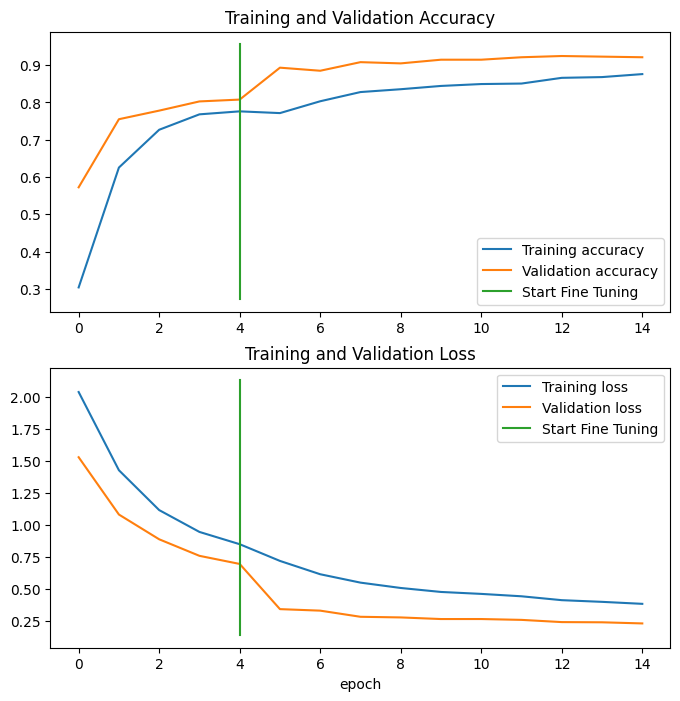

In [ ]:
compare_history(history_10_per_data_aug_model,
                history_fine_all,
                ini_epochs=5)